###**Regressão Linear Simples**

Utilização do framework scikit-learn para implementar regressão linear simples

Importando frameworks necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

###**Downloading Data**

Para fazer download dos dados, usaremos !wget para baixá-los do IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-11-26 02:28:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-11-26 02:28:17 (1.95 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



###**Compreendendo os dados**

Consumo de combustível.csv:
Baixamos um conjunto de dados de consumo de combustível, FuelConsumption.csv, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos leves para venda no varejo no Canadá. Origem do conjunto de dados

*   MODELEAR, por ex. 2014
*   FAÇA, por exemplo Acura
MODELO ex. ILX
*   CLASSE DO VEÍCULO ex. SUV
*   TAMANHO DO MOTOR, por exemplo 4.7
*   CILINDROS por exemplo 6
*   TRANSMISSÃO ex. A6
*   CONSUMO DE COMBUSTÍVEL em CIDADE (L/100 km), por ex. 9.9
*   CONSUMO DE COMBUSTÍVEL em HWY (L/100 km), por ex. 8.9
*   PENTE DE CONSUMO DE COMBUSTÍVEL (L/100 km) ex. 9.2
*   EMISSÕES DE CO2 (g/km) ex. 182 --> baixo --> 0











###**Lendo os dados**

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###Exploração de dados

Vamos primeiro fazer uma exploração descritiva de nossos dados.

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Vamos selecionar alguns recursos para explorar mais.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Podemos plotar cada um desses recursos:

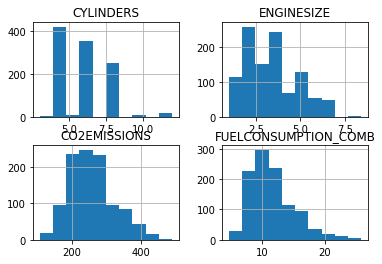

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Agora, vamos plotar cada um desses recursos em relação à Emissão, para ver o quão linear é o relacionamento deles:

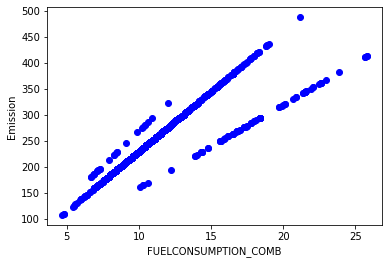

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

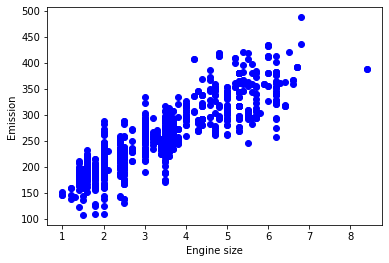

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

###**Prática**

Plote o CILINDRO vs a Emissão, para ver quão linear é a relação deles:

In [13]:
# (1) Importando os pacotes matemáticos 
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# (2) Definindo os intervalos
theta = np.arange(0, 2*np.pi, 0.01)
z_ = np.arange(-100, 100, 0.01)

In [15]:
# (3) Definindo o raio 
r = np.sqrt(4)

In [16]:
# (4) Criando grid para 3D
theta, z_ = np.meshgrid(theta, z_)

In [17]:
# (5) Eqs. do sistema de coordenadas cilindricas
x = r*np.cos(theta)
y = r*np.sin(theta)
z = z_

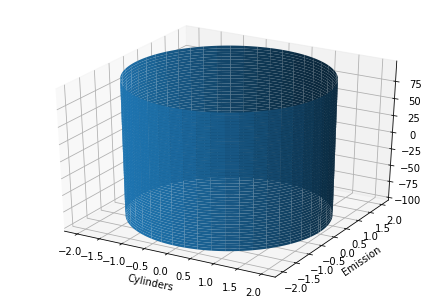

In [26]:
#(6) Vinculando a figura ás coordenadas 3D
fig = plt.figure()
ax = Axes3D(fig)

# (7) Plotando o gráfico
ax.plot_surface(x,y,z)
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

###**Criando um conjunto de dados de treinamento e teste**

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste. Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Isso significa que sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função np.random.rand():

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

###**Modelo de Regressão Simples**

A regressão linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a 'soma residual dos quadrados' entre o valor real y no conjunto de dados e o valor previsto yhat usando a aproximação linear.

###**Distribuição de dados de trem**

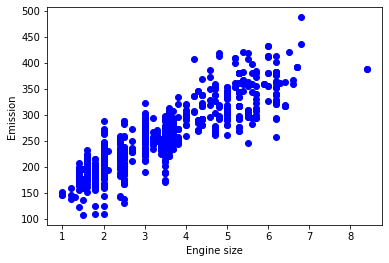

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

###**Modelagem**

Usando o pacote sklearn para modelar dados.

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.96368692]]
Intercept:  [125.51427732]


Conforme mencionado anteriormente, **Coeficiente** e **Interceptação** na regressão linear simples são os parâmetros da linha de ajuste. Dado que é uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são o intercepto e a inclinação da linha, o sklearn pode estimá-los diretamente de nossos dados. Observe que todos os dados devem estar disponíveis para percorrer e calcular os parâmetros.

###**Saídas de plotagem**

Podemos traçar a linha de ajuste sobre os dados:

Text(0, 0.5, 'Emission')

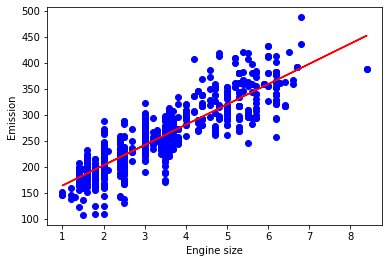

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

###**Avaliação**

Comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. As métricas de avaliação fornecem um papel fundamental no desenvolvimento de um modelo, pois fornecem informações sobre as áreas que precisam ser melhoradas.

Existem diferentes métricas de avaliação do modelo, vamos usar o MSE aqui para calcular a precisão do nosso modelo com base no conjunto de teste:

*   Erro Absoluto Médio: É a média do valor absoluto dos erros. Essa é a métrica mais fácil de entender, pois é apenas o erro médio.

*   Erro quadrático médio (MSE): Erro quadrático médio (MSE) é a média do erro quadrático. É mais popular do que o erro absoluto médio porque o foco é mais voltado para erros grandes. Isso se deve ao fato de o termo ao quadrado aumentar exponencialmente os erros maiores em comparação aos menores.

*   Raiz do erro quadrático médio (RMSE).

*   R-quadrado não é um erro, mas sim uma métrica popular para medir o desempenho do seu modelo de regressão. Representa o quão perto os pontos de dados estão da linha de regressão ajustada. Quanto maior o valor de R ao quadrado, melhor o modelo ajusta seus dados. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).





In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.82
Residual sum of squares (MSE): 1071.58
R2-score: 0.72


###**Exercício**

Vamos ver quais são as métricas de avaliação se treinarmos um modelo de regressão usando o recurso FUELCONSUMPTION_COMB.

Comece selecionando FUELCONSUMPTION_COMB como os dados train_x do dataframe do trem e, em seguida, selecione FUELCONSUMPTION_COMB como os dados test_x do dataframe de teste

In [33]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Agora treine um Modelo de Regressão Linear usando o train_x que você criou e o train_y criado anteriormente

In [34]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Encontre as previsões usando a função de previsão do modelo e os dados test_x:

In [35]:
predictions = regr.predict(test_x)

Por fim, use as previsões e os dados test_y e encontre o valor do erro médio absoluto usando as funções np.absolute e np.mean como feito anteriormente

In [36]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 19.53


Podemos ver que o MAE é muito pior quando treinamos usando ENGINESIZE do que FUELCONSUMPTION_COMB

####**Author**
Saeed Aghabozorgi

####**Other Contributors**
Joseph Santarcangelo

Azim Hirjani

####**Change Log**
Date (YYYY-MM-DD)	Version	Changed By	Change Description
2020-11-03	2.1	Lakshmi Holla	Changed URL of the csv
2020-08-27	2.0	Lavanya	Moved lab to course repo in GitLab
© IBM Corporation 2020. All rights reserved. 